# Introduction

In this notebook, *apo*-*holo* comparisons between different anchoring patterns of MHC alleles plotted next to each other. The anchoring patterns were determined by finding the peptide motifs of each MHC allele from the [MHCMotifAtlas](http://mhcmotifatlas.org/home) and using these strong motifs as anchors for the peptide.


In [1]:
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from python_pdb.formats.residue import THREE_TO_ONE_CODE

In [2]:
DATABASE = '../data/external/histo.db'

In [3]:
mhc_anchor_position_query = '''
SELECT allele_slug,
       position,
       amino_acid,
       peptide_length
FROM motifs
WHERE motifs.grade in ('high', 'dominant')
ORDER BY motifs.allele_slug
'''
with sqlite3.connect(DATABASE) as conn:
    mhc_anchor_position_df = pd.read_sql_query(mhc_anchor_position_query, conn)

mhc_anchor_position_df

,allele_slug,position,amino_acid,peptide_length
0,hla_a_01_01,2,T,9
1,hla_a_01_01,3,D,9
2,hla_a_01_01,9,Y,9
3,hla_a_02_01,2,L,9
4,hla_a_02_01,9,L,9
...,...,...,...,...
319,hla_g_01_03,9,L,9
320,hla_g_01_04,1,K,9
321,hla_g_01_04,1,R,9
322,hla_g_01_04,3,P,9


# Load *apo*-*holo* comparisons

In [4]:
apo_holo_comparison = pd.read_csv('../data/processed/apo-holo-tcr-pmhc-class-I-comparisons/pmhc_per_res_apo_holo.csv')

peptide_apo_holo_comparison = apo_holo_comparison.query("chain_type == 'antigen_chain'").copy()
peptide_apo_holo_comparison

,complex_id,structure_x_name,structure_y_name,chain_type,residue_name,residue_seq_id,residue_insert_code,rmsd,ca_distance,chi_angle_change,com_distance
181,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,VAL,1,NaN,0.354933,0.330887,0.200330,0.316020
182,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,VAL,2,NaN,0.262440,0.073709,0.030793,0.085332
183,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,VAL,3,NaN,0.256739,0.248310,-0.007898,0.215858
184,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,GLY,4,NaN,0.568505,0.622876,NaN,0.318856
185,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,GLY,7,NaN,0.346240,0.192317,NaN,0.324260
...,...,...,...,...,...,...,...,...,...,...,...
126149,7rtr_D-E-C-A-B_tcr_pmhc,7rtd_A-B-C_pmhc.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,antigen_chain,ARG,5,NaN,1.064663,0.157924,0.364432,0.705033
126150,7rtr_D-E-C-A-B_tcr_pmhc,7rtd_A-B-C_pmhc.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,antigen_chain,THR,6,NaN,0.421897,0.345439,0.097701,0.344074
126151,7rtr_D-E-C-A-B_tcr_pmhc,7rtd_A-B-C_pmhc.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,antigen_chain,PHE,7,NaN,1.225982,0.317819,-0.347835,0.883236
126152,7rtr_D-E-C-A-B_tcr_pmhc,7rtd_A-B-C_pmhc.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,antigen_chain,LEU,8,NaN,1.323615,0.310356,0.612672,0.270049


In [5]:
peptide_apo_holo_comparison['peptide_length'] = \
    peptide_apo_holo_comparison.groupby(['complex_id',
                                         'structure_x_name',
                                         'structure_y_name']).transform('size')

In [6]:
peptide_apo_holo_comparison['amino_acid'] = peptide_apo_holo_comparison['residue_name'].map(THREE_TO_ONE_CODE)

## Load summary data

In [7]:
summary_df = pd.read_csv('../data/processed/apo-holo-tcr-pmhc-class-I/apo_holo_summary.csv')
summary_df['group_name'] = summary_df['file_name'].str.replace('.pdb', '')

summary_df

/var/scratch/bmcmaste/1372352/ipykernel_2297588/1956598565.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  summary_df['group_name'] = summary_df['file_name'].str.replace('.pdb', '')


,file_name,pdb_id,structure_type,state,alpha_chain,beta_chain,antigen_chain,mhc_chain1,mhc_chain2,cdr_sequences_collated,peptide_sequence,mhc_slug,group_name
0,1ao7_D-E-C-A-B_tcr_pmhc.pdb,1ao7,tcr_pmhc,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLA...,LLFGYPVYV,hla_a_02_01,1ao7_D-E-C-A-B_tcr_pmhc
1,1bd2_D-E-C-A-B_tcr_pmhc.pdb,1bd2,tcr_pmhc,holo,D,E,C,A,B,NSMFDY-ISSIKDK-AAMEGAQKLV-MNHEY-SVGAGI-ASSYPGG...,LLFGYPVYV,hla_a_02_01,1bd2_D-E-C-A-B_tcr_pmhc
2,1bii_A-B-P_pmhc.pdb,1bii,pmhc,apo,NaN,NaN,P,A,B,NaN,RGPGRAFVTI,h2_dd,1bii_A-B-P_pmhc
3,1ddh_A-B-P_pmhc.pdb,1ddh,pmhc,apo,NaN,NaN,P,A,B,NaN,RGPGRAFVTI,h2_dd,1ddh_A-B-P_pmhc
4,1duz_A-B-C_pmhc.pdb,1duz,pmhc,apo,NaN,NaN,C,A,B,NaN,LLFGYPVYV,hla_a_02_01,1duz_A-B-C_pmhc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,8gon_D-E-C-A-B_tcr_pmhc.pdb,8gon,tcr_pmhc,holo,D,E,C,A,B,TSESDYY-QEAYKQQN-ASSGNTPLV-SGHNS-FNNNVP-ASTWGR...,NaN,NaN,8gon_D-E-C-A-B_tcr_pmhc
354,8gop_A-B_tcr.pdb,8gop,tcr,apo,A,B,NaN,NaN,NaN,TSESDYY-QEAYKQQN-ASSGNTPLV-SGHNS-FNNNVP-ASTWGR...,NaN,NaN,8gop_A-B_tcr
355,8gvb_A-B-P-H-L_tcr_pmhc.pdb,8gvb,tcr_pmhc,holo,A,B,P,H,L,YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...,RYPLTFGW,hla_a_24_02,8gvb_A-B-P-H-L_tcr_pmhc
356,8gvg_A-B-P-H-L_tcr_pmhc.pdb,8gvg,tcr_pmhc,holo,A,B,P,H,L,YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...,RFPLTFGW,hla_a_24_02,8gvg_A-B-P-H-L_tcr_pmhc


# Annotate *apo*-*holo* data with allele information

In [8]:
peptide_apo_holo_comparison = peptide_apo_holo_comparison.merge(summary_df, how='left', left_on='complex_id', right_on='group_name')
peptide_apo_holo_comparison

,complex_id,structure_x_name,structure_y_name,chain_type,residue_name,residue_seq_id,residue_insert_code,rmsd,ca_distance,chi_angle_change,...,state,alpha_chain,beta_chain,antigen_chain,mhc_chain1,mhc_chain2,cdr_sequences_collated,peptide_sequence,mhc_slug,group_name
0,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,VAL,1,NaN,0.354933,0.330887,0.200330,...,holo,D,E,C,A,B,TRDTAYY-QPWWGEQN-AMSVPSGDGSYQFT-MNHEY-SVGEGT-A...,VVVGADGVGK,hla_a_11_01,7ow6_D-E-C-A-B_tcr_pmhc
1,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,VAL,2,NaN,0.262440,0.073709,0.030793,...,holo,D,E,C,A,B,TRDTAYY-QPWWGEQN-AMSVPSGDGSYQFT-MNHEY-SVGEGT-A...,VVVGADGVGK,hla_a_11_01,7ow6_D-E-C-A-B_tcr_pmhc
2,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,VAL,3,NaN,0.256739,0.248310,-0.007898,...,holo,D,E,C,A,B,TRDTAYY-QPWWGEQN-AMSVPSGDGSYQFT-MNHEY-SVGEGT-A...,VVVGADGVGK,hla_a_11_01,7ow6_D-E-C-A-B_tcr_pmhc
3,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,GLY,4,NaN,0.568505,0.622876,NaN,...,holo,D,E,C,A,B,TRDTAYY-QPWWGEQN-AMSVPSGDGSYQFT-MNHEY-SVGEGT-A...,VVVGADGVGK,hla_a_11_01,7ow6_D-E-C-A-B_tcr_pmhc
4,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,GLY,7,NaN,0.346240,0.192317,NaN,...,holo,D,E,C,A,B,TRDTAYY-QPWWGEQN-AMSVPSGDGSYQFT-MNHEY-SVGEGT-A...,VVVGADGVGK,hla_a_11_01,7ow6_D-E-C-A-B_tcr_pmhc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5833,7rtr_D-E-C-A-B_tcr_pmhc,7rtd_A-B-C_pmhc.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,antigen_chain,ARG,5,NaN,1.064663,0.157924,0.364432,...,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY,YLQPRTFLL,hla_a_02_01,7rtr_D-E-C-A-B_tcr_pmhc
5834,7rtr_D-E-C-A-B_tcr_pmhc,7rtd_A-B-C_pmhc.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,antigen_chain,THR,6,NaN,0.421897,0.345439,0.097701,...,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY,YLQPRTFLL,hla_a_02_01,7rtr_D-E-C-A-B_tcr_pmhc
5835,7rtr_D-E-C-A-B_tcr_pmhc,7rtd_A-B-C_pmhc.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,antigen_chain,PHE,7,NaN,1.225982,0.317819,-0.347835,...,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY,YLQPRTFLL,hla_a_02_01,7rtr_D-E-C-A-B_tcr_pmhc
5836,7rtr_D-E-C-A-B_tcr_pmhc,7rtd_A-B-C_pmhc.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,antigen_chain,LEU,8,NaN,1.323615,0.310356,0.612672,...,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY,YLQPRTFLL,hla_a_02_01,7rtr_D-E-C-A-B_tcr_pmhc


# Combine anchoring information with *apo*-*holo* comparisons

In [9]:
mhc_anchor_position_df['anchor'] = True

In [10]:
peptide_apo_holo_comparison = peptide_apo_holo_comparison.merge(
    mhc_anchor_position_df,
    how='left',
    left_on=['mhc_slug', 'residue_seq_id', 'amino_acid', 'peptide_length'],
    right_on=['allele_slug', 'position', 'amino_acid', 'peptide_length'],
)

In [11]:
def collate_anchors(group: pd.DataFrame) -> list[int]:
    return sorted(group[group['anchor'] == True]['residue_seq_id'].unique().tolist())

anchoring_strategies = peptide_apo_holo_comparison.groupby(['structure_x_name', 'structure_y_name']).apply(collate_anchors)
anchoring_strategies.name = 'anchoring_strategy'
anchoring_strategies = anchoring_strategies.reset_index()

peptide_apo_holo_comparison = peptide_apo_holo_comparison.merge(anchoring_strategies, how='left', on=['structure_x_name', 'structure_y_name'])

In [12]:
def markup_anchor(anchors: list[int]) -> str:
    anchors = [f'p{anchor}' for anchor in anchors]
    return '-'.join(anchors)
    
peptide_apo_holo_comparison['anchoring_strategy_str'] = peptide_apo_holo_comparison['anchoring_strategy'].map(markup_anchor)

In [13]:
def find_dominant_anchor(group: pd.DataFrame) -> str:
    anchor_types = group['anchoring_strategy_str'].unique()
    lengths = np.array([len(anchor) for anchor in anchor_types])
    index = np.argmax(lengths)
    
    return anchor_types[index]

dominant_anchors = peptide_apo_holo_comparison.groupby('mhc_slug').apply(find_dominant_anchor)
dominant_anchors.name = 'dominant_anchor'
dominant_anchors = dominant_anchors.reset_index()

peptide_apo_holo_comparison = peptide_apo_holo_comparison.merge(dominant_anchors, how='left', on='mhc_slug')

The below correction is applied as it is assumed that those peptide marked as solely 'p2' or 'p9' anchors are most likely still anchored by something at either end that is not necessarily the high or dominant motif.

In [14]:
peptide_apo_holo_comparison['dominant_anchor'] = peptide_apo_holo_comparison['dominant_anchor'].map(
    lambda strategy: 'p2-p9' if strategy in ('p2', 'p9') else strategy
)

In [15]:
peptide_apo_holo_comparison_with_anchor = peptide_apo_holo_comparison.query("anchoring_strategy_str != ''")

## Visualising the results

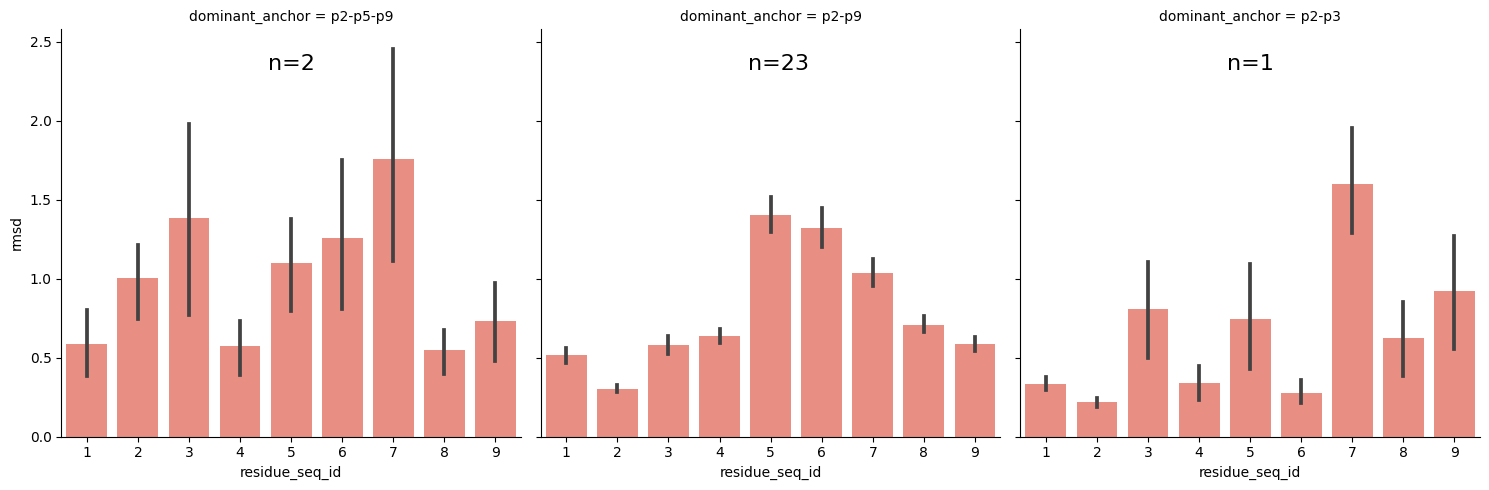

In [16]:
g = sns.catplot(peptide_apo_holo_comparison_with_anchor,
                col='dominant_anchor',
                x='residue_seq_id', y='rmsd',
                sharex=False,
                color='salmon',
                kind='bar')

def annotate(data, **kws):
    groups = data.groupby(['mhc_slug', 'peptide_sequence'])
    ax = plt.gca()
    ax.text(0.45, 0.9, f'n={len(groups)}', fontsize=16, transform=ax.transAxes)

g.map_dataframe(annotate)

plt.savefig('../report/figures/peptide_per_res_rmsd_from_anchoring.svg')

hla_a_02_01
p2-p9


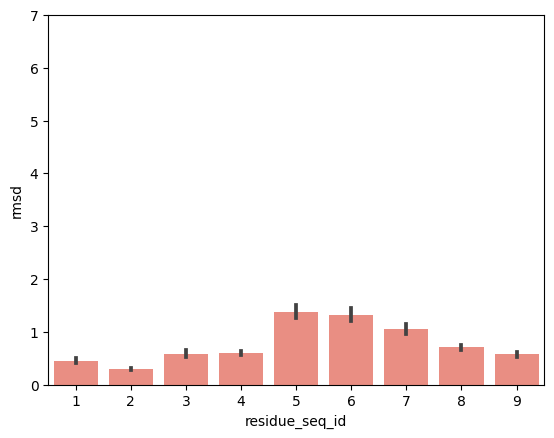

hla_a_02_06
p2-p9


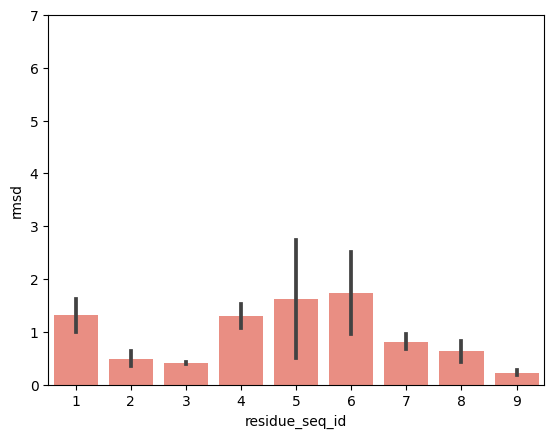

hla_a_03_01
p2-p9


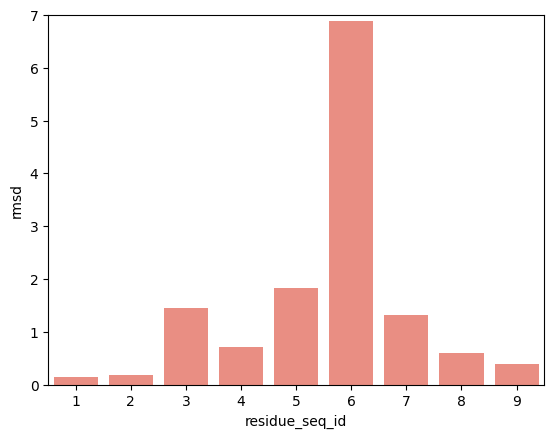

hla_a_24_02
p2-p9


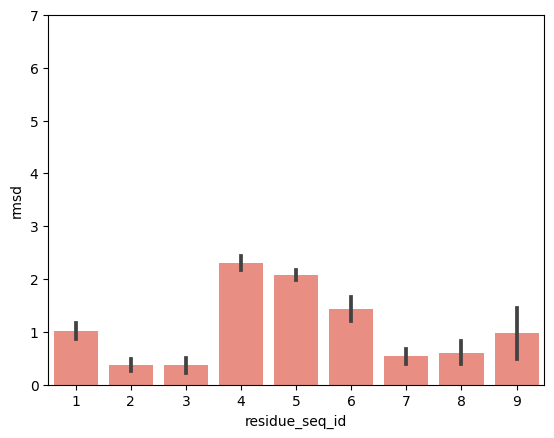

hla_b_08_01
p2-p5-p9


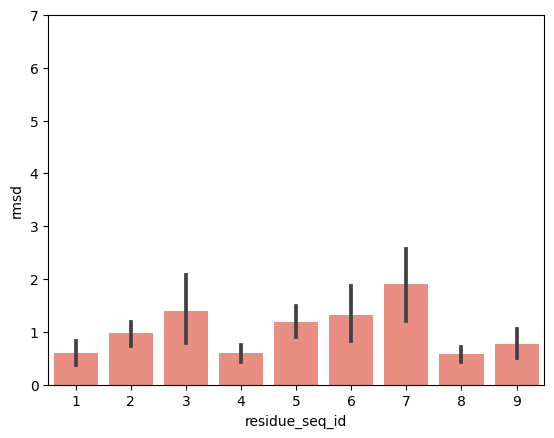

hla_b_35_01
p2-p9


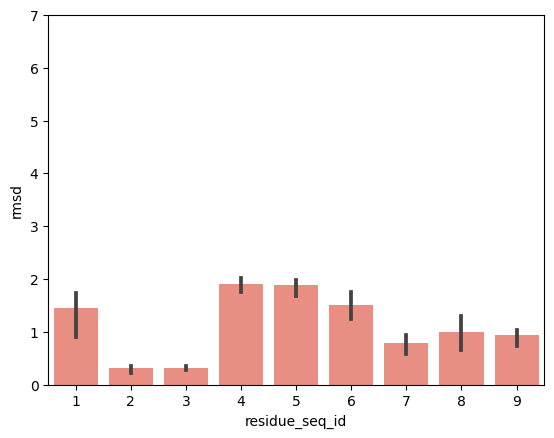

hla_b_37_01
p2-p5-p9


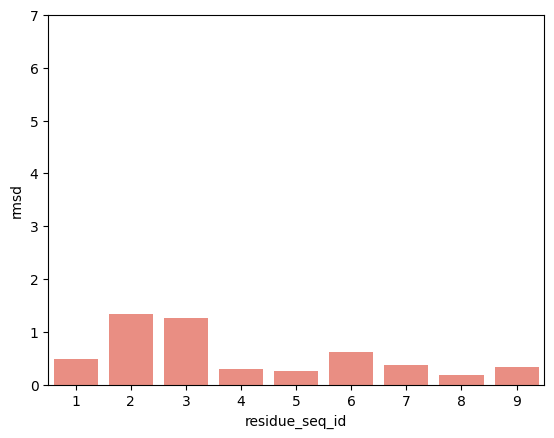

hla_b_42_01
p2-p9


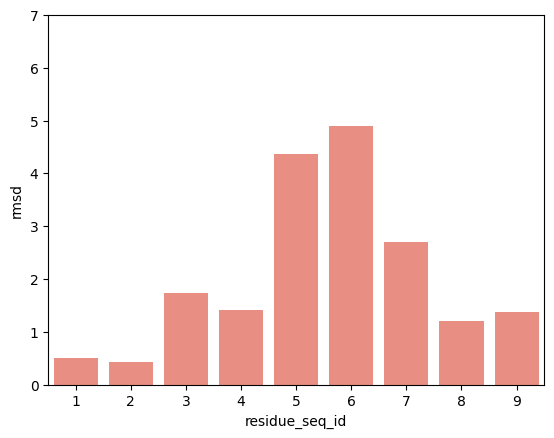

hla_b_44_05
p2-p9


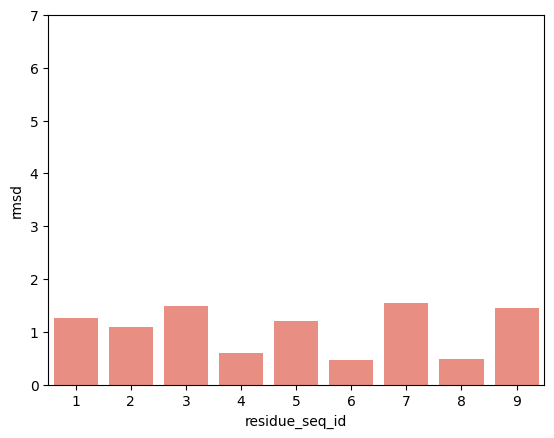

hla_b_53_01
p2-p9


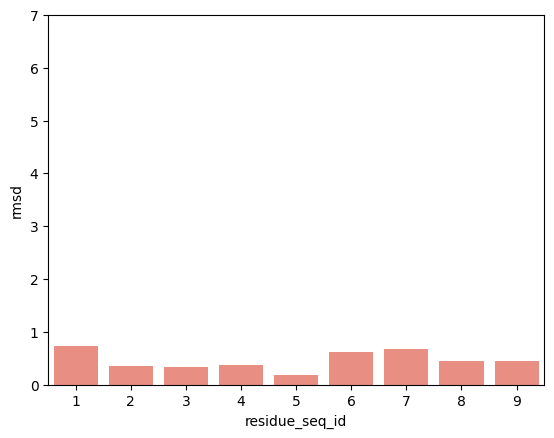

hla_b_81_01
p2-p9


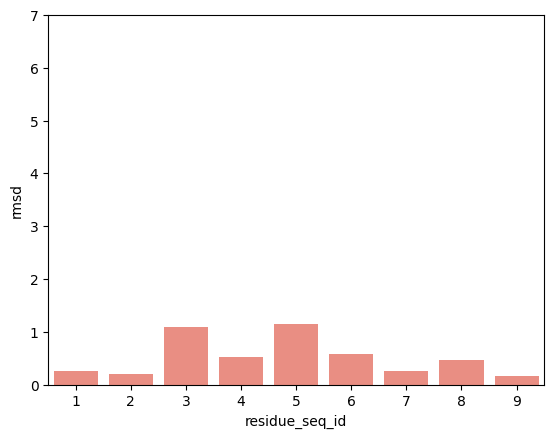

hla_c_08_02
p2-p3


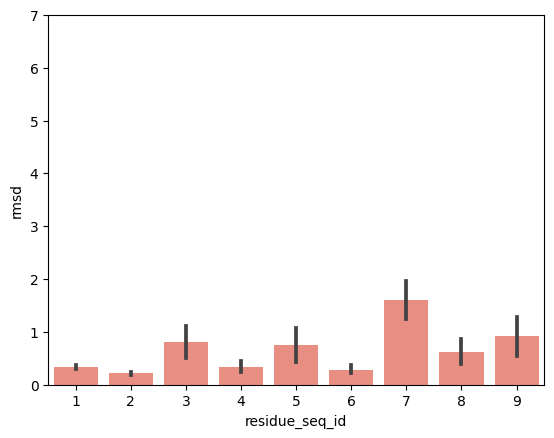

hla_e_01_03
p2-p9


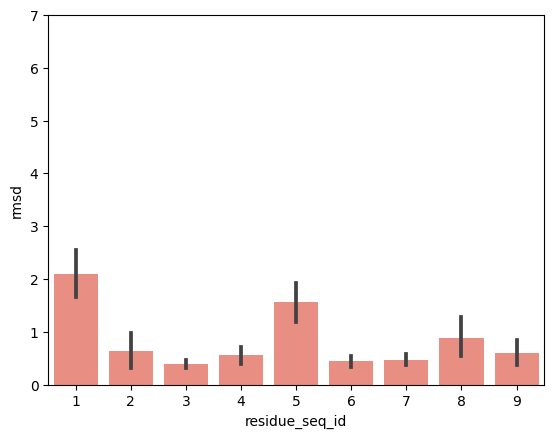

In [17]:
max_rmsd = peptide_apo_holo_comparison_with_anchor['rmsd'].max()

for mhc_slug, group in peptide_apo_holo_comparison_with_anchor.groupby('mhc_slug'):
    print(mhc_slug)
    print(group['dominant_anchor'].unique()[0])
    plot = sns.barplot(group, x='residue_seq_id', y='rmsd', color='salmon')
    plot.set_ylim((0, np.ceil(max_rmsd)))
    plt.show()

<AxesSubplot: xlabel='residue_seq_id', ylabel='rmsd'>

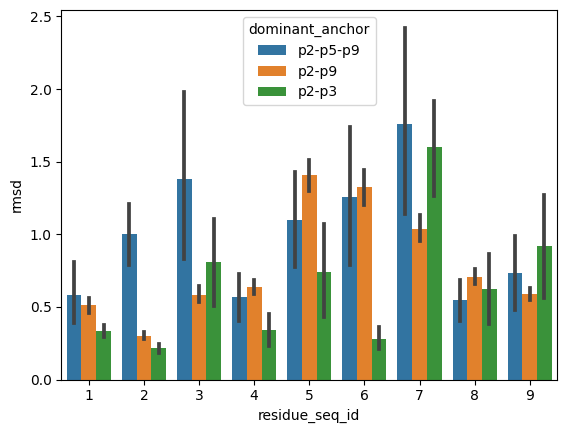

In [18]:
sns.barplot(peptide_apo_holo_comparison_with_anchor,
            hue='dominant_anchor',
            x='residue_seq_id', y='rmsd')

In [19]:
representative_alleles = (peptide_apo_holo_comparison_with_anchor.groupby('dominant_anchor')[['dominant_anchor', 'mhc_slug']]
                                                                 .sample(1, random_state=1)
                                                                 .reset_index(drop=True))
representative_alleles

,dominant_anchor,mhc_slug
0,p2-p3,hla_c_08_02
1,p2-p5-p9,hla_b_08_01
2,p2-p9,hla_a_02_01


<AxesSubplot: xlabel='residue_seq_id', ylabel='rmsd'>

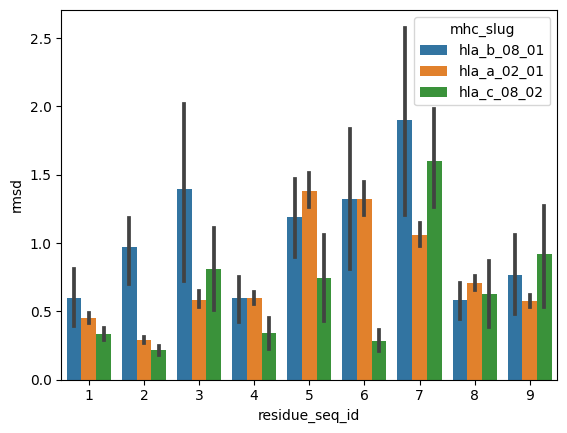

In [20]:
sns.barplot(peptide_apo_holo_comparison_with_anchor.query("mhc_slug.isin(@representative_alleles['mhc_slug'])"),
            hue='mhc_slug',
            x='residue_seq_id', y='rmsd')

# Conclusion

From the visualisations it is clear that the profile of peptide conformational changes depends on the mhc allele and how the peptides are anchored by the allele.